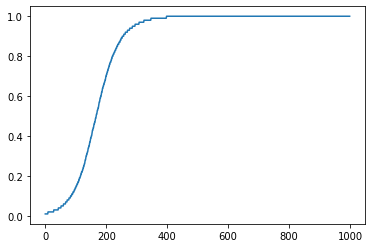

In [57]:
import numpy as np
import matplotlib.pyplot as plt

LOG_FILE = "Sim_Aug-23-2021-12-33-03.log"
CSV_FILE = "data_Aug-23-2021-12-33-03_n-0.03_.csv"

file = open(LOG_FILE).readlines()
array = [float(line) for line in file[1:]]

plt.plot(array)

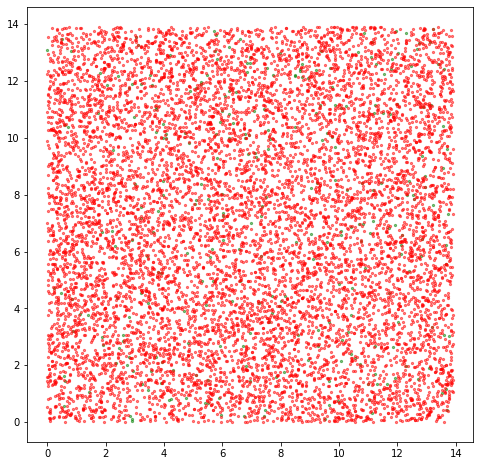

In [58]:
import pandas as pd

df = pd.read_csv(CSV_FILE)

# add figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

cellsx = df["locx"][df["state"] == True]
cellsy = df["locy"][df["state"] == True]
emptyx = df["locx"][df["state"] == False]
emptyy = df["locy"][df["state"] == False]

ax.scatter(cellsx, cellsy, color='green', s=5, alpha=0.5)
ax.scatter(emptyx, emptyy, color='red', s=5, alpha=0.5)

In [59]:
df

,Unnamed: 0,state,locx,locy,gain-r-0.95,r-0.95,gain-r-1.43,r-1.43,gain-r-1.90,r-1.90,...,gain-r-3.33,r-3.33,gain-r-3.81,r-3.81,gain-r-4.29,r-4.29,gain-r-4.76,r-4.76,gain-r-5.24,r-5.24
0,0,True,7.634223,9.948580,0.065217,0.065217,-0.019910,0.045307,-0.010381,0.034926,...,-0.001217,0.038721,-0.002341,0.036379,-0.000801,0.035579,-0.000624,0.034955,-0.000575,0.034380
1,1,False,8.384688,7.579551,0.013514,0.013514,0.009288,0.022801,-0.003263,0.019538,...,0.002628,0.032883,-0.001592,0.031291,-0.000149,0.031142,0.001672,0.032814,-0.000460,0.032354
2,2,False,5.893214,8.984655,0.014925,0.014925,0.022575,0.037500,0.000497,0.037997,...,0.001466,0.034722,-0.002920,0.031802,0.002404,0.034206,-0.001410,0.032796,-0.001747,0.031049
3,3,False,6.087019,12.404932,0.082759,0.082759,-0.032054,0.050704,-0.006767,0.043937,...,0.003355,0.046043,-0.004711,0.041332,-0.004032,0.037299,-0.002121,0.035178,-0.000938,0.034240
4,4,False,13.404948,5.333830,0.024000,0.024000,0.000291,0.024291,-0.001903,0.022388,...,0.000927,0.029894,0.002966,0.032860,0.001891,0.034751,-0.002062,0.032689,-0.002673,0.030016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,False,7.467219,7.354633,0.025806,0.025806,-0.013148,0.012658,0.010269,0.022928,...,0.003180,0.030250,0.001693,0.031943,-0.001535,0.030408,0.000520,0.030928,0.000757,0.031685
9996,9996,False,8.442907,9.811066,0.022901,0.022901,0.009994,0.032895,0.006653,0.039548,...,-0.001209,0.036000,-0.001041,0.034959,0.001186,0.036145,-0.000594,0.035550,-0.001093,0.034457
9997,9997,False,13.264286,10.407417,0.029851,0.029851,-0.009689,0.020161,0.005284,0.025445,...,0.001493,0.033790,0.002723,0.036513,0.000980,0.037492,0.000273,0.037765,0.000141,0.037906
9998,9998,False,4.149012,6.210385,0.022059,0.022059,0.002481,0.024540,0.005232,0.029772,...,-0.004713,0.021300,0.000219,0.021519,0.001900,0.023419,0.001915,0.025334,-0.000293,0.025041


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier as RF


columns = [item for item in df.columns[1:] if 'gain' in item]
data = df[columns]
targets = df["state"]

X_train, X_test, y_train, y_test = train_test_split(
    data, targets, random_state=100)

n_est = 100
model = RF(n_estimators=n_est).fit(X_train, y_train)

# output
print("Trained Random Forest with n_est=%d." % n_est)
print("--- Test Sample Size: \t %d" % y_test.size)
print("--- Train Sample Size: \t %d" % y_train.size)
print("\n--> Score: \t %.2f" % model.score(X_test, y_test))

# calculate importances
imp = permutation_importance(
    model, X_test, y_test,
    n_repeats=10, random_state=100, scoring='roc_auc')


Trained Random Forest with n_est=100.
--- Test Sample Size: 	 2500
--- Train Sample Size: 	 7500

--> Score: 	 0.97



-----------------------
Fit:
--> r0 = 0.931 +\- 0.339
--> a = 0.123 +\- 0.062


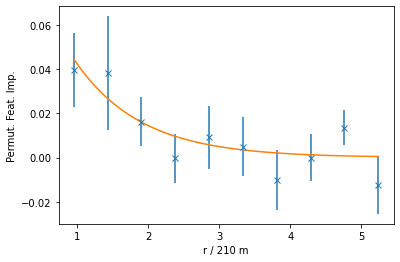

In [63]:
from numpy import array, inf, exp
from scipy.optimize import curve_fit

def model(x, a, r0):
    return a * exp(- x / r0)

mean = imp.importances_mean
std = imp.importances_std

# plot result
fig = plt.figure()

labels = [float(txt.split('gain-r-')[-1]) for txt in columns]
plt.errorbar(labels, mean, yerr=std, fmt='x')

rmin = labels[0]
rmax = labels[-1]
xs = np.linspace(rmin, rmax, 100)

# fit exp function to data
x0 = array([0.0, 0.1])
bnds = (array([-inf, 0.0]), array([inf, inf]))
popt, pcov = curve_fit(model, labels, mean[:], p0=x0, bounds=bnds)
plt.plot(xs, model(xs, *popt))

perr = np.sqrt(np.diag(pcov))

print("\n-----------------------")
print("Fit:")
print("--> r0 = %.3f +\- %.3f" % (popt[1], perr[1]))
print("--> a = %.3f +\- %.3f" % (popt[0], perr[0]))

plt.xlabel("r / 210 m")
plt.ylabel("Permut. Feat. Imp.")
plt.show()